In [ ]:
from PIL import Image
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import math

# 1.0 Hybrid Images

### 1.1 Gaussian kernel

In [ ]:
def gaussian2D(sigma, kernel_size):
  kernel = np.zeros((kernel_size, kernel_size))
  for i in range(kernel_size):
    for j in range(kernel_size):
        x = i - kernel_size // 2
        y = j - kernel_size // 2
        kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
  kernel /= (2*math.pi*sigma**2)
  return kernel 


### 1.2 Create Hybrid Images

True

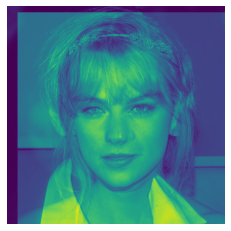

In [ ]:
img1 = Image.open("image1.jpg")
img1 = np.array(img1)
#img1 = cv2.resize(img1, (1024, 1024))
img2 = Image.open("image2.jpg")
img2 = np.array(img2)

rows, cols = img1.shape[:2]
M = np.float32([[1, 0, 50], [0, 1,30]])
im1 = cv2.warpAffine(img1, M, (cols, rows))


gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

blended = gray1*0.5 + gray2*0.5

plt.imshow(blended);
plt.axis(False);

cv2.imwrite('blended.png', blended)
#im = Image.fromarray(blended)
#im.save('blended.png','PNG')

In [ ]:
img1 = Image.open("image1.jpg")
img1 = np.array(img1)
#img1 = cv2.resize(img1, (1024, 1024))
img2 = Image.open("image2.jpg")
img2 = np.array(img2)
from scipy import ndimage
import math

rows, cols = img1.shape[:2]
M = np.float32([[1, 0, 50], [0, 1,30]])
img1 = cv2.warpAffine(img1, M, (cols, rows))

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kernel = gaussian2D(2, 5)

print(kernel)

print(kernel.shape)

print(gray1.shape)

[[0.01463746 0.02129738 0.02413309 0.02129738 0.01463746]
 [0.02129738 0.0309875  0.03511344 0.0309875  0.02129738]
 [0.02413309 0.03511344 0.03978874 0.03511344 0.02413309]
 [0.02129738 0.0309875  0.03511344 0.0309875  0.02129738]
 [0.01463746 0.02129738 0.02413309 0.02129738 0.01463746]]
(5, 5)
(1024, 1024)


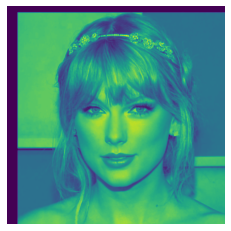

In [ ]:
#for i in range(3):
#  img2[:,:,i] = ndimage.convolve(img1[:,:,i], kernel)
filter_gray1 = ndimage.convolve(gray1, kernel)

plt.imshow(filter_gray1)
plt.axis(False);

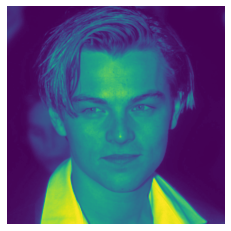

In [ ]:
def blur(I):
  #kernel = gaussian2D(sigma, kernal_size)
  blur = ndimage.convolve(I, kernel) 
  return blur

C = blur(gray2) + (gray1 - blur(gray1))


plt.imshow(blur(gray2))
plt.axis(False);

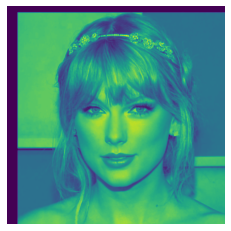

In [ ]:
plt.imshow(blur(gray1))
plt.axis(False);

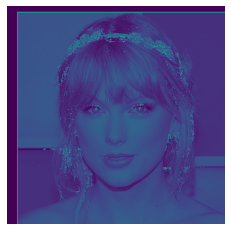

In [ ]:
plt.imshow(gray1 - blur(gray1))
plt.axis(False);

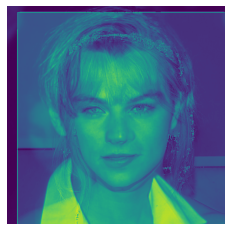

In [ ]:
plt.imshow(C)
plt.axis(False);

### 1.3 Fourier Spectra

In [ ]:
def fourier_spec(gray):

  #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  X = np.abs(np.fft.fftshift(np.fft.fft2(gray)))
  
  magnitude_spectrum = 20 * np.log(X)
  
  magnitude_spectrum = np.uint8(magnitude_spectrum / magnitude_spectrum.max() * 255)
  
  plt.imshow(magnitude_spectrum)
  
  plt.axis(False);

  im = Image.fromarray(magnitude_spectrum)
  im.save("fourier_spec_.jpg")


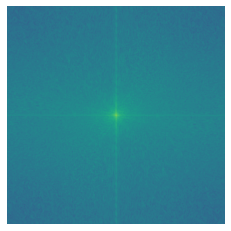

In [ ]:
fourier_spec(gray1)

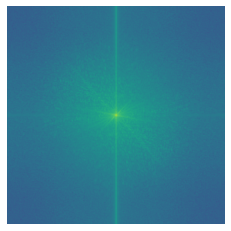

In [ ]:
fourier_spec(gray2)

In [ ]:
  def blur(img, sigma):
    kernel_size = 6 * sigma + 1
    blur = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)
    return blur

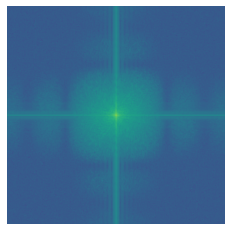

In [ ]:
fourier_spec(blur(gray1))

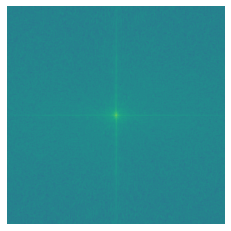

In [ ]:
fourier_spec(gray1 - blur(gray1))

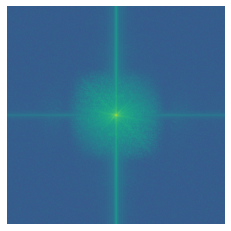

In [ ]:
fourier_spec(blur(gray2))

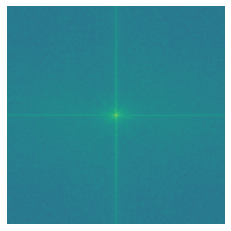

In [ ]:
fourier_spec(C)

# 2.0 Laplacian Blending

### 2.1 Gaussian Pyramid

In [ ]:
import math

def gaussian2D(sigma, kernel_size):
  kernel = np.zeros((kernel_size, kernel_size))
  for i in range(kernel_size):
    for j in range(kernel_size):
        x = i - kernel_size // 2
        y = j - kernel_size // 2
        kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
  kernel /= (2*math.pi*sigma**2)
  return kernel 

def gausspyr(I, n_levels, sigma):
    pyramid = [I]
    kernel_size = 2 * math.ceil(3*sigma) + 1
    kernel = gaussian2D(sigma, kernel_size)

    for i in range(1, n_levels):
        I = ndimage.convolve(I, kernel)
        I = I[::2, ::2]
        #I = cv2.resize(I,(I.shape[0]//2,I.shape[1]//2))
        pyramid.append(I)
    return pyramid


8


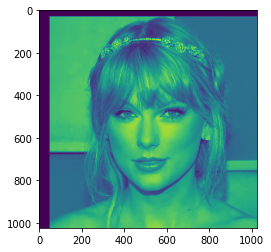

In [ ]:
A = gausspyr(gray1, 8, 0.71)

print(len(A))

plt.imshow(A[0])
#plt.axis(False)

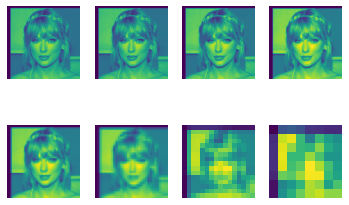

In [ ]:
fig, axes = plt.subplots(2, len(A)//2)
for i, ax in enumerate(axes.flat):
    ax.imshow(A[i])
    ax.axis('off')
    im = Image.fromarray(A[i])
    im.save('A-{}.jpg'.format(i))

plt.show()

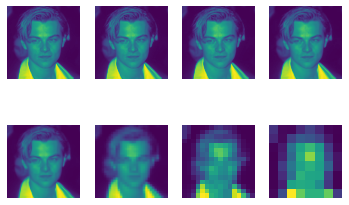

In [ ]:
B = gausspyr(gray2, 8, 0.71)

fig, axes = plt.subplots(2, len(B)//2)
for i, ax in enumerate(axes.flat):
    ax.imshow(B[i])
    ax.axis('off')
    im = Image.fromarray(B[i])
    im.save('B-{}.jpg'.format(i))

plt.show()

### 2.2 Laplacian Pyramid

In [ ]:
import math

def gaussian2D(sigma, kernel_size):
  kernel = np.zeros((kernel_size, kernel_size))
  for i in range(kernel_size):
    for j in range(kernel_size):
        x = i - kernel_size // 2
        y = j - kernel_size // 2
        kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
  kernel /= (2*math.pi*sigma**2)
  return kernel 

def lappyr(I, n_levels, sigma):
    pyramid = []
    temp = I
    kernel_size = 2 * math.ceil(3*sigma) + 1
    kernel = gaussian2D(sigma, kernel_size)
    for i in range(n_levels):
        G = ndimage.convolve(temp, kernel)
        L = temp - G 
        pyramid.append(L)
        temp = temp[::2, ::2]
    pyramid.append(temp)
    return pyramid


9


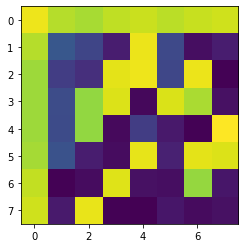

In [ ]:
L = lappyr(gray1, 8, 0.71)

print(len(L))

plt.imshow(L[7])

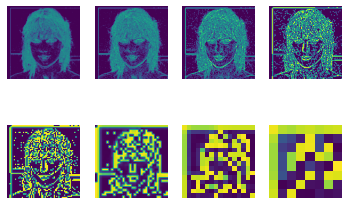

In [ ]:
fig, axes = plt.subplots(2, len(L)//2)
for i, ax in enumerate(axes.flat):
    ax.imshow(L[i])
    ax.axis('off')
    im = Image.fromarray(L[i])
    im.save('L-{}.jpg'.format(i))

plt.show()

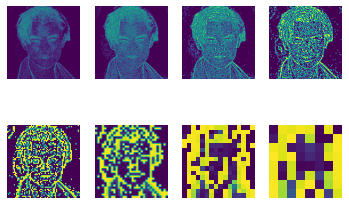

In [ ]:
J = lappyr(gray2, 8, 0.71)

fig, axes = plt.subplots(2, len(J)//2)
for i, ax in enumerate(axes.flat):
    ax.imshow(J[i])
    ax.axis('off')
    im = Image.fromarray(J[i])
    im.save('J-{}.jpg'.format(i))

plt.show()

### 2.3 Image BLending

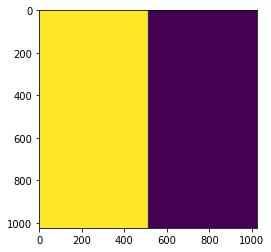

In [ ]:
def create_mask(height, width):
    mask = np.zeros((height, width))
    mask[:, :width//2] = 1
    return mask

# Example usage
mask = create_mask(1024, 1024)

plt.imshow(mask)
#plt.axis(False)

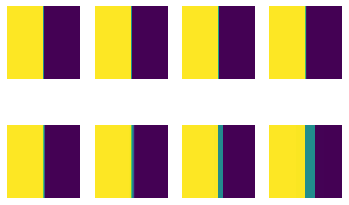

In [ ]:
M = gausspyr(mask, 8, 0.71)

fig, axes = plt.subplots(2, len(M)//2)
for i, ax in enumerate(axes.flat):
    ax.imshow(M[i])
    ax.axis('off')
    #im = Image.fromarray(M[i])
    #cv2.imwrite('M-{}.png'.format(i),im)

plt.show()

9 9 8 8


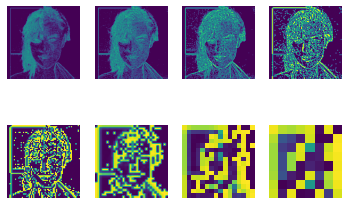

In [ ]:
one = np.ones((1024,1024))

ones = [one]
for i in range(7):
  one = one[::2, ::2]
  ones.append(one)


def blend_lappyr(A, B, mask):
    pyramid = []

    for i in range(8):
        temp = np.multiply(A[i], mask[i]) + np.multiply(B[i],  (ones[i] - mask[i])) 
        pyramid.append(temp)
    return pyramid

print(len(L),len(J),len(ones),len(M))

O = blend_lappyr(L,J,M)

fig, axes = plt.subplots(2, len(O)//2)
for i, ax in enumerate(axes.flat):
    ax.imshow(O[i])
    ax.axis('off')
    #im = Image.fromarray(M[i])
    #cv2.imwrite('M-{}.png'.format(i),im)

plt.show()

True

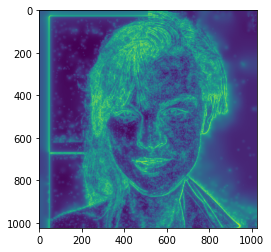

In [ ]:
def invert_lap_pyr(pyr):
    n_levels = len(pyr)
    output = pyr[-1]
    for i in range(n_levels-2, -1, -1):
        output = cv2.pyrUp(output) + pyr[i]
    return output

C1 = invert_lap_pyr(O)

min_value = np.min(C1)
max_value = np.max(C1)

C1 = (C1 - min_value) / (max_value - min_value)

plt.imshow(C1)



C1_uint8 = np.uint8(C1)

#im = Image.fromarray(C1_uint8)
cv2.imwrite("C1.jpg", C1_uint8)

### 2.4 Blending two images with a mask other than a step

# 3.0 Pulse Estimation from Video

### 3.1 Read video and define regions opf interest

In [ ]:
import numpy as np
import cv2 as cv
from scipy.signal import butter, filtfilt


def read_video_into_numpy(filename):
  cap = cv.VideoCapture(filename)
  frames = []
  while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
      print("Can't receive frame (stream end?). Exiting ...")
      break

    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    frames.append(frame)

  cap.release()
  video = np.stack(frames, axis=0)#converts to numpy array(T,H,W,C)
  video = np.transpose(video, (1,2,3,0))#(T,H,W,C)->(H,W,C,T)
  return frames



Can't receive frame (stream end?). Exiting ...


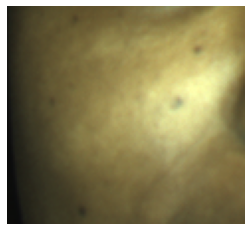

In [ ]:
frames = read_video_into_numpy('alice.avi')

frame = frames[0]

y1 = 260
h1 = 110
x1 = 220
w1 = 120

cheek_region = [260,110,220,120]

# Extract the region of the cheek
cheek = frame[y1:y1 + h1, x1:x1 + w1]


plt.imshow(cheek)
plt.axis(False);

im = Image.fromarray(cheek)
im.save('cheek.jpg')


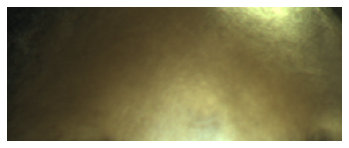

In [ ]:
y2 = 35
h2 = 100
x2 = 240
w2 = 250

forehead_region = [35,100,240,250]

# Extract the region of the forehead
forehead = frame[y2:y2 + h2, x2:x2 + w2]

plt.imshow(forehead)
plt.axis(False);

im = Image.fromarray(forehead)
im.save('forehead.jpg')

### 3.3 Compute signals

In [ ]:
print(type(frames))

<class 'list'>


In [ ]:
def signal(input):

  signal = []
  x = input[0]
  h = input[1]
  y = input[2]
  w = input[3]

  for i in range(len(frames)):
    temp = frames[i]
    region = temp[y:y + h, x:x + w]
    avg_green = np.mean(region[:,:,1])
    signal.append(avg_green)

  return signal


In [ ]:
signal_ch = signal(cheek_region)
signal_fore = signal(forehead_region)

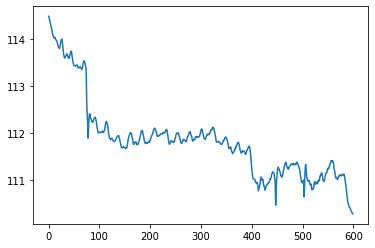

In [ ]:
x = np.arange(0,len(frames))
y = signal_ch

plt.plot(x, y)
plt.show()

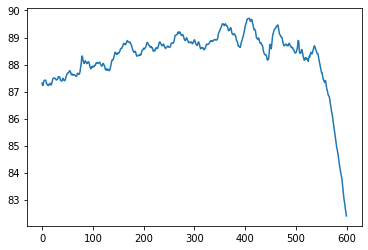

In [ ]:
x = np.arange(0,len(frames))
y = signal_fore

plt.plot(x, y)
plt.show()

### 3.4 Bandpass filter

In [ ]:
def bandpass_filter(signal, low_cutoff, high_cutoff, fs, order):
  nyquist = 0.5 * fs
  low = low_cutoff / nyquist
  high = high_cutoff / nyquist
  b, a = butter(order, [low, high], btype='band')
  filtered_signal = filtfilt(b, a, signal)
  
  return filtered_signal

filt_signal_ch = bandpass_filter(signal_ch, 0.8, 3, 30, 1)
filt_signal_fore = bandpass_filter(signal_fore, 0.8, 3, 30, 1)

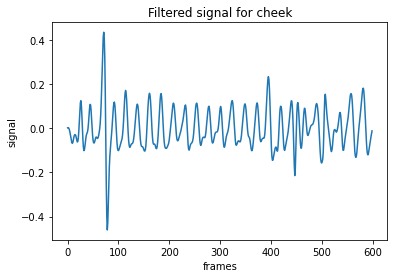

<Figure size 432x288 with 0 Axes>

In [ ]:
x = np.arange(0,len(frames))
y = filt_signal_ch

plot = plt.plot(x, y)
plt.title("Filtered signal for cheek")
plt.xlabel("frames")
plt.ylabel("signal")
plt.show()

plt.savefig('filt_signal_ch.png')

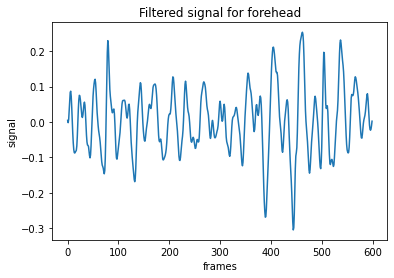

<Figure size 432x288 with 0 Axes>

In [ ]:
x = np.arange(0, len(frames))
y = filt_signal_fore

plot = plt.plot(x, y)
plt.title("Filtered signal for forehead")
plt.xlabel("frames")
plt.ylabel("signal")
plt.show()

plt.savefig('filt_signal_fore.png')

### 3.4 Plot Fourier spectra

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


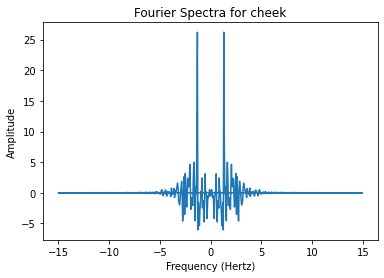

In [ ]:
fourier_ch = np.fft.fft(filt_signal_ch)
freq = np.fft.fftfreq(len(frames), d=1/30)

plt.plot(freq, fourier_ch)
plt.title("Fourier Spectra for cheek")
plt.xlabel("Frequency (Hertz)")
plt.ylabel("Amplitude")
plt.show()


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


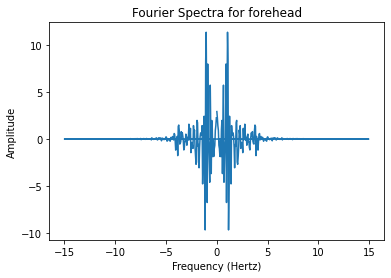

In [ ]:
fourier_fore = np.fft.fft(filt_signal_fore)
freq = np.fft.fftfreq(len(frames), d=1/30)

plt.plot(freq, fourier_fore)
plt.title("Fourier Spectra for forehead")
plt.xlabel("Frequency (Hertz)")
plt.ylabel("Amplitude")
plt.show()


### 3.5 Estimate Alice's average pulse rate

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


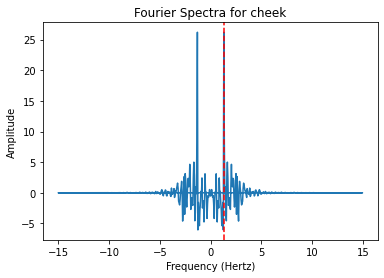

1.3


In [ ]:
fourier_ch = np.fft.fft(filt_signal_ch)
freq = np.fft.fftfreq(len(frames), d=1/30)

plt.plot(freq, fourier_ch)
plt.title("Fourier Spectra for cheek")
plt.xlabel("Frequency (Hertz)")
plt.ylabel("Amplitude")

max_index = np.argmax(fourier_ch)

max_x1 = freq[max_index]

plt.axvline(max_x1, color='r', linestyle='--')

plt.show()

print(max_x1)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


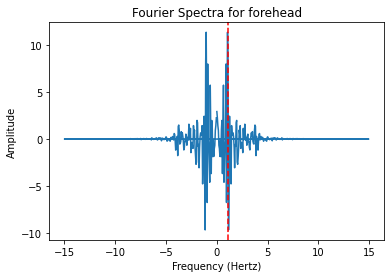

1.05


In [ ]:
fourier_fore = np.fft.fft(filt_signal_fore)
freq = np.fft.fftfreq(len(frames), d=1/30)

plt.plot(freq, fourier_fore)
plt.title("Fourier Spectra for forehead")
plt.xlabel("Frequency (Hertz)")
plt.ylabel("Amplitude")

max_index = np.argmax(fourier_fore)

max_x2 = freq[max_index]

plt.axvline(max_x2, color='r', linestyle='--')

plt.show()

print(max_x2)